In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [3]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [5]:
# Display first few rows
print("Iris Dataset Preview:")
print(iris_df.head())

Iris Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [7]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['kmeans_cluster'] = kmeans.fit_predict(iris_df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


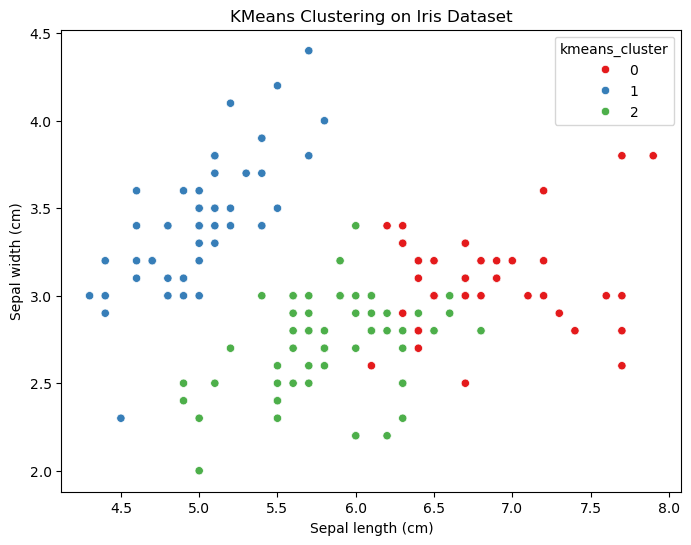

In [9]:
# Visualize KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1],
    hue=iris_df['kmeans_cluster'], palette='Set1'
)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

In [11]:

# Perform hierarchical clustering
linked = linkage(iris_df.iloc[:, :4], method='ward')


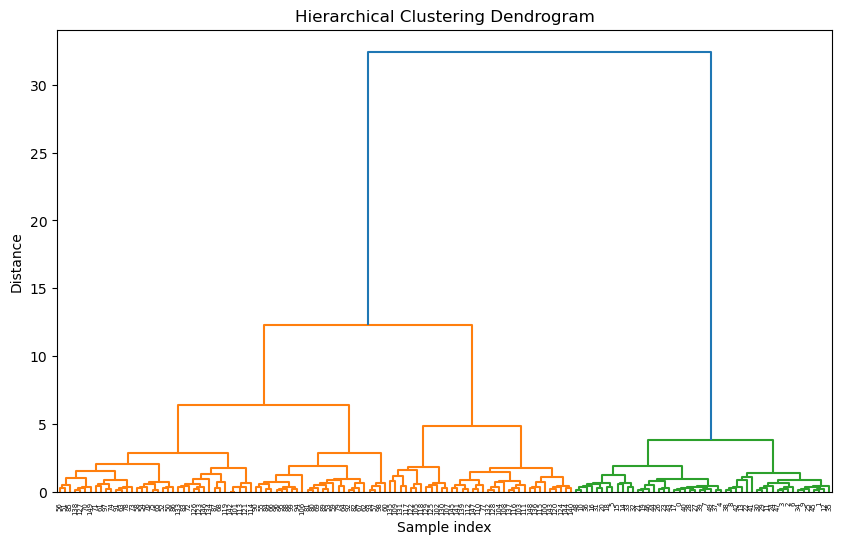

In [13]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [15]:
# Assign clusters from dendrogram
iris_df['hierarchical_cluster'] = fcluster(linked, 3, criterion='maxclust')


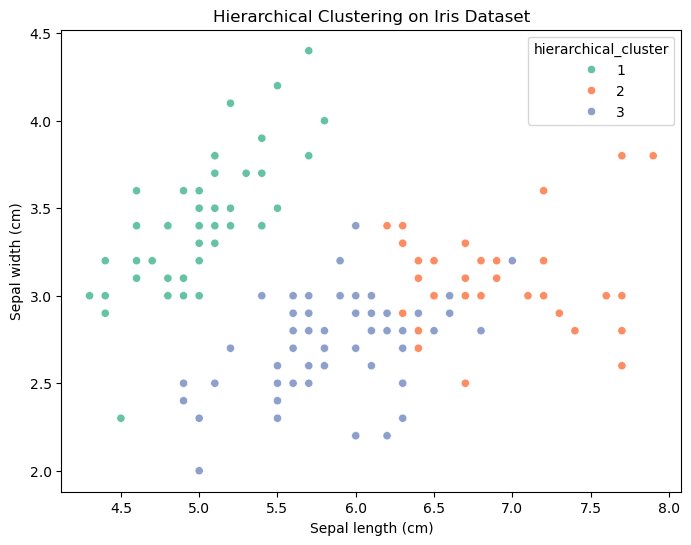

In [17]:
# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1],
    hue=iris_df['hierarchical_cluster'], palette='Set2'
)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()